# Stock Market Prediction and Forecasting Using Stacked LSTM
Using Keras and Tensorflow

##### Dataset
Yahoo Finance - Stock of Reliance Industries Limited
NSE: RELIANCE: https://finance.yahoo.com/quote/RELIANCE.NS/history?period1=1433635200&period2=1591488000&interval=1d&filter=history&frequency=1d

In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [2]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('Reliance_Stock.csv')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1228 non-null   float64
 2   High       1228 non-null   float64
 3   Low        1228 non-null   float64
 4   Close      1228 non-null   float64
 5   Adj Close  1228 non-null   float64
 6   Volume     1228 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.8+ KB


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,453.399994,455.000000,441.549988,442.725006,425.550629,4958862.0
1,2015-06-09,441.774994,445.325012,438.674988,441.850006,424.709564,4184606.0
2,2015-06-10,443.000000,454.950012,442.500000,452.899994,435.330933,6176034.0
3,2015-06-11,453.000000,454.750000,436.825012,438.575012,421.561676,6709574.0
4,2015-06-12,439.500000,446.350006,439.125000,444.924988,427.665283,9849112.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2020-06-01,1480.0,1538.349976,1475.949951,1520.349976,1520.349976,18434012.0
1225,2020-06-02,1526.0,1540.000000,1520.800049,1535.699951,1535.699951,10224049.0
1226,2020-06-03,1545.0,1560.000000,1533.349976,1541.650024,1541.650024,11713461.0
1227,2020-06-04,1544.0,1589.500000,1541.000000,1579.800049,1579.800049,15784379.0
1228,2020-06-05,1595.0,1618.000000,1573.699951,1581.699951,1581.699951,15246965.0


In [5]:
df.shape

(1228, 7)

In [6]:
df_close = df['Close']

In [7]:
df_close.shape

(1228,)

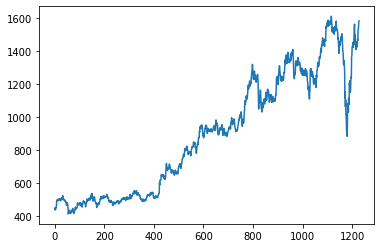

In [8]:
plt.plot(df_close)

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [9]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [10]:
df_close.shape

(1228, 1)

In [11]:
print(df_close)

[[0.02338571]
 [0.0226536 ]
 [0.0318991 ]
 ...
 [0.94285362]
 [0.97477365]
 [0.97636329]]


In [12]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [13]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [15]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [16]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 7s 171ms/step - loss: 0.0528 - val_loss: 0.0177
Epoch 2/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0089 - val_loss: 0.0093
Epoch 3/100
13/13 [==============================] - 2s 131ms/step - loss: 0.0031 - val_loss: 0.0100
Epoch 4/100
13/13 [==============================] - 2s 125ms/step - loss: 0.0013 - val_loss: 0.0097
Epoch 5/100
13/13 [==============================] - 2s 122ms/step - loss: 0.0011 - val_loss: 0.0093
Epoch 6/100
13/13 [==============================] - 2s 121ms/step - loss: 0.0010 - val_loss: 0.0088
Epoch 7/100
13/13 [==============================] - 2s 121ms/step - loss: 9.3504e-04 - val_loss: 0.0085
Epoch 8/100
13/13 [==============================] - 2s 120ms/step - loss: 9.3095e-04 - val_loss: 0.0084
Epoch 9/100
13/13 [==============================] - 2s 127ms/step - loss: 9.0482e-04 - val_loss: 0.0087
Epoch 10/100
13/13 [==============================] - 2s 125ms/step - loss: 9.4

13/13 [==============================] - 2s 121ms/step - loss: 4.8104e-04 - val_loss: 0.0069
Epoch 79/100
13/13 [==============================] - 2s 119ms/step - loss: 5.2133e-04 - val_loss: 0.0029
Epoch 80/100
13/13 [==============================] - 2s 123ms/step - loss: 4.6856e-04 - val_loss: 0.0047
Epoch 81/100
13/13 [==============================] - 2s 129ms/step - loss: 4.8200e-04 - val_loss: 0.0030
Epoch 82/100
13/13 [==============================] - 2s 124ms/step - loss: 4.8890e-04 - val_loss: 0.0062
Epoch 83/100
13/13 [==============================] - 2s 120ms/step - loss: 5.0643e-04 - val_loss: 0.0029
Epoch 84/100
13/13 [==============================] - 2s 122ms/step - loss: 4.6991e-04 - val_loss: 0.0040
Epoch 85/100
13/13 [==============================] - 2s 119ms/step - loss: 4.3518e-04 - val_loss: 0.0032
Epoch 86/100
13/13 [==============================] - 2s 122ms/step - loss: 4.7917e-04 - val_loss: 0.0032
Epoch 87/100
13/13 [==============================] - 2s 12

In [32]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [33]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

802.6581290749948

In [35]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1331.8658249504874

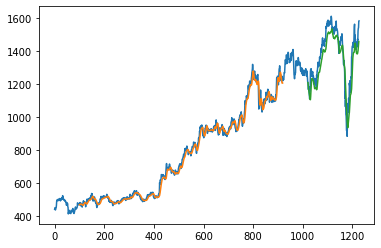

In [36]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predict the next 30 days Stock Price

In [37]:
len(test_data), x_test.shape

(307, (206, 100, 1))

In [38]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()


In [39]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.91118463 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079
 0.76463703 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139
 0.5851654  0.6181313  0.5423683  0.57776065 0.50279251 0.49634993
 0.46330038 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473
 0.54504569 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854
 0.6620997  0.65042781 0.67368794 0.64791772 0.61503546 0.63026342
 0.67707661 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924
 0.84922714 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165
 0.86368529 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482
 0.85441462 0.87403524 0.85843081 0.83178201 0.85253205 0.85884916
 0.85073323 0.844458   0.862447   0.88478678 0.87821873 0.92503192
 0.9378752  0.94285362 0.97477365 0.97636329 0.90432    0.90199876
 0.89197659 0.87909275 0.8654539  0.85194856 0.83894658 0.82637954
 0.81456196 0.80347401 0.79300737 0.78305733 0.77352643 0.76432538
 0.75537455 0.74660504 0.73795944 0.72939104 0.720

7 day output [[0.55622864]]
8 day input [0.7765181  0.77388248 0.74999482 0.71640139 0.5851654  0.6181313
 0.5423683  0.57776065 0.50279251 0.49634993 0.46330038 0.42079615
 0.50467508 0.39264125 0.44229929 0.55847473 0.54504569 0.54454369
 0.51513375 0.5848307  0.55696863 0.55445854 0.6620997  0.65042781
 0.67368794 0.64791772 0.61503546 0.63026342 0.67707661 0.69364326
 0.6882465  0.79387957 0.7999875  0.83855924 0.84922714 0.84788844
 0.84688434 0.86803608 0.84250843 0.86360165 0.86368529 0.90198096
 0.9474387  0.95987202 0.87902192 0.90503482 0.85441462 0.87403524
 0.85843081 0.83178201 0.85253205 0.85884916 0.85073323 0.844458
 0.862447   0.88478678 0.87821873 0.92503192 0.9378752  0.94285362
 0.97477365 0.97636329 0.90432    0.90199876 0.89197659 0.87909275
 0.8654539  0.85194856 0.83894658 0.82637954 0.81456196 0.80347401
 0.79300737 0.78305733 0.77352643 0.76432538 0.75537455 0.74660504
 0.73795944 0.72939104 0.72088361 0.71240407 0.70392513 0.69542909
 0.68693578 0.67842644 0.

15 day output [[0.4832685]]
16 day input [0.50279251 0.49634993 0.46330038 0.42079615 0.50467508 0.39264125
 0.44229929 0.55847473 0.54504569 0.54454369 0.51513375 0.5848307
 0.55696863 0.55445854 0.6620997  0.65042781 0.67368794 0.64791772
 0.61503546 0.63026342 0.67707661 0.69364326 0.6882465  0.79387957
 0.7999875  0.83855924 0.84922714 0.84788844 0.84688434 0.86803608
 0.84250843 0.86360165 0.86368529 0.90198096 0.9474387  0.95987202
 0.87902192 0.90503482 0.85441462 0.87403524 0.85843081 0.83178201
 0.85253205 0.85884916 0.85073323 0.844458   0.862447   0.88478678
 0.87821873 0.92503192 0.9378752  0.94285362 0.97477365 0.97636329
 0.90432    0.90199876 0.89197659 0.87909275 0.8654539  0.85194856
 0.83894658 0.82637954 0.81456196 0.80347401 0.79300737 0.78305733
 0.77352643 0.76432538 0.75537455 0.74660504 0.73795944 0.72939104
 0.72088361 0.71240407 0.70392513 0.69542909 0.68693578 0.67842644
 0.66988355 0.66130334 0.65268499 0.64403105 0.63534433 0.6266278
 0.61788517 0.60911995 

26 day output [[0.40743223]]
27 day input [0.5848307  0.55696863 0.55445854 0.6620997  0.65042781 0.67368794
 0.64791772 0.61503546 0.63026342 0.67707661 0.69364326 0.6882465
 0.79387957 0.7999875  0.83855924 0.84922714 0.84788844 0.84688434
 0.86803608 0.84250843 0.86360165 0.86368529 0.90198096 0.9474387
 0.95987202 0.87902192 0.90503482 0.85441462 0.87403524 0.85843081
 0.83178201 0.85253205 0.85884916 0.85073323 0.844458   0.862447
 0.88478678 0.87821873 0.92503192 0.9378752  0.94285362 0.97477365
 0.97636329 0.90432    0.90199876 0.89197659 0.87909275 0.8654539
 0.85194856 0.83894658 0.82637954 0.81456196 0.80347401 0.79300737
 0.78305733 0.77352643 0.76432538 0.75537455 0.74660504 0.73795944
 0.72939104 0.72088361 0.71240407 0.70392513 0.69542909 0.68693578
 0.67842644 0.66988355 0.66130334 0.65268499 0.64403105 0.63534433
 0.6266278  0.61788517 0.60911995 0.60033602 0.59153724 0.5827266
 0.57390583 0.56507438 0.55622864 0.54736108 0.53845948 0.52950662
 0.52048081 0.5113588  0.5

In [40]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [41]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [42]:
len(df_close)

1228

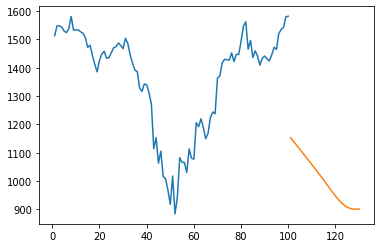

In [43]:
plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))